# Import the Liberories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
data= pd.read_csv("Hotel_Sentiment_train.csv")

In [3]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


# Detail about dataset

In [4]:
data.shape

(38932, 5)

In [5]:
data.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [7]:
data.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


# EDA

percentage of default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64
percentage distribution by Review


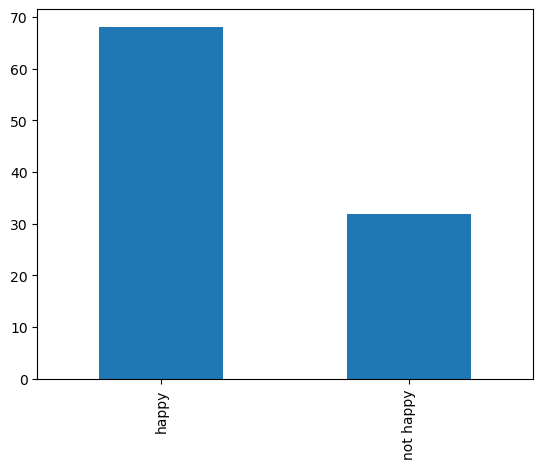

In [8]:
 print("percentage of default\n")
print(round(data.Is_Response.value_counts(normalize=True)*100,2))
round(data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
print("percentage distribution by Review")
plt.show()

In [9]:
data.drop(columns=['User_ID', 'Browser_Used', 'Device_Used'], inplace=True)

In [10]:
import re
import string
def text_clean(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\w\d\w*', '', text)
    text=re.sub('[''""_]','',text)
    text=re.sub('\n','',text)
    return text
clean=lambda x : text_clean(x)

In [11]:
data['Clean_Description']=pd.DataFrame(data.Description.apply(clean))
data.head()

,Description,Is_Response,Clean_Description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


# Model Train

In [12]:
from sklearn.model_selection import train_test_split
indep_var = data.Clean_Description
dep_var = data.Is_Response
X_train, X_test, Y_train, Y_test=train_test_split(indep_var,dep_var, test_size=0.3)
#indep_var = data.Clean_Description
#dep_var = data.Is_Response
#X_train, Y_train, X_test, Y_test = train_test_split(indep_var, dep_var, test_size=0.3 , random_state=225)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

# Assuming you have your data loaded into X (features) and Y (labels)
# Split the data into training and testing sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define your vectorizer 'a'
a = TfidfVectorizer()

# Define your classifier 'b' with the 'lbfgs' solver
b = LogisticRegression(solver='lbfgs')

# Create a pipeline
model = Pipeline([
    ('Vectorizer', a),
    ('Classifier', b)
])

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Compute the confusion matrix
d = confusion_matrix(predictions, Y_test)

print(d)

[[7521  884]
 [ 468 2807]]


# Model Prediction

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(predictions, Y_test))

Accuracy :  0.8842465753424658


# Check the new Review prediction

In [21]:
c =["I'm unhappy"]
result = model.predict(c)
print(result)

['happy']
